In [1]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [2]:
f = open("train.txt",'r')

In [3]:
label=[]
phrase=[]
lines = f.readlines()
for l in lines:
    label.append(l[:5])
    phrase.append(l[5:])

In [4]:
labelSet=set(label)
print(labelSet)

{'(GER)', '(JPN)', '(HIN)', '(ARA)', '(SPA)', '(CHI)', '(TEL)', '(KOR)', '(FRE)', '(ITA)', '(TUR)'}


In [5]:
df = pd.DataFrame(list(zip(label, phrase)), columns =['label', 'doc']) 
print(df) 

      label                                                doc
0     (GER)   IThe importance and popularity of travelling ...
1     (TUR)   It is an important decision , how to plan you...
2     (CHI)   Some people believe that young people can enj...
3     (TEL)   Travelling is usually considered as good recr...
4     (ARA)   i agree that . Life is a person live period o...
...     ...                                                ...
9895  (CHI)   Nowadays , more and more people go abroad , n...
9896  (KOR)   In accomplishing something that is risky come...
9897  (SPA)   At the beginning of the 21st century , the in...
9898  (HIN)   The number of cars in use across the world ha...
9899  (CHI)   Many people think it is betters to have borad...

[9900 rows x 2 columns]


In [6]:
print(df["doc"][0])

 IThe importance and popularity of travelling is still raising , Everybody is interested in getting to know other countries and continents but the ways how to do it , are very differently . I agree with the statement that it is the best way to travel in a group led by a tour guide . If you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit . The tour guide would organise everything for you , so the only thing you would have to do is to go to the appointments with the group . Another aspect is that you would get to know a lot of interesting people . When you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do . That is why you are never borring when you travel in groups . If you decide to travel in a group and you visit a country which is dangerouses then the tour guide can inform

In [7]:
from nltk.corpus import stopwords


In [8]:
stopwords = set(stopwords.words('english'))

def clean_phrase(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

clean_phrase(df["doc"][0])

'ithe importance popularity travelling still raising everybody interested getting know countries continents ways differently agree statement best way travel group led tour guide travel group tour guide get know famous places get know interesting things country decided visit tour guide would organise everything thing would go appointments group another aspect would get know lot interesting people travel group easy get know people usually sit bus sleep hotel like others never borring travel groups decide travel group visit country dangerouses tour guide inform dangerouses say avoid risks sometimes special rules things bring trouble follow furthermore tour guide help communication problems able speak language people country visit speak tour guide help able speak visit doctor go police something happended ask tour guide would able help reasons prefer tavel group tour guide'

In [9]:
df["doc"]=cleaned_lines = df["doc"].apply(lambda x: clean_phrase(x))

In [10]:
df

,label,doc
0,(GER),ithe importance popularity travelling still ra...
1,(TUR),important decision plan syllabus students pref...
2,(CHI),people believe young people enjoy life older p...
3,(TEL),travelling usually considered good recreation ...
4,(ARA),agree life person live period time people beli...
...,...,...
9895,(CHI),nowadays people go abroad matter children old ...
9896,(KOR),accomplishing something risky comes reward suc...
9897,(SPA),beginning 21st century increasing number cars ...
9898,(HIN),number cars use across world growing steadily ...


In [11]:
from sklearn.preprocessing import LabelEncoder
X=df["doc"]
y=df["label"]
lf = LabelEncoder().fit(y)
new_y = lf.transform(y)

In [12]:
y=df["label"].tolist()
le = LabelEncoder()
le.fit(df.label.unique())

LabelEncoder()

In [13]:
langue = le.classes_

In [14]:
langue_encoder = [(langue[i],i) for i in range(len(langue))]
print(langue_encoder)

[('(ARA)', 0), ('(CHI)', 1), ('(FRE)', 2), ('(GER)', 3), ('(HIN)', 4), ('(ITA)', 5), ('(JPN)', 6), ('(KOR)', 7), ('(SPA)', 8), ('(TEL)', 9), ('(TUR)', 10)]


In [15]:
new_y=le.fit_transform(y)

In [16]:
print(y[:5])
print(new_y[:5]) # one hot 

['(GER)', '(TUR)', '(CHI)', '(TEL)', '(ARA)']
[ 3 10  1  9  0]


# TF-IDF avec logistic regression

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

cv = CountVectorizer(stop_words='english')
cv_X = cv.fit_transform(X)

tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, new_y, random_state=4)

In [19]:
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_X = cv.transform(X)


In [20]:
print(cv_train.shape)
y_train.shape

(7425, 53507)


(7425,)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
bow_lr = lr.fit(cv_train, y_train)

c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
bow_test_predictions = bow_lr.predict(cv_test)

In [23]:
print(bow_test_predictions)

[8 6 6 ... 0 2 9]


In [24]:
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

lr = LogisticRegression()
tfidf_lr = lr.fit(tf_train, y_train)
print(tfidf_lr)

LogisticRegression()


c:\Users\guoxu\Desktop\myenvs\mlstat\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
tfidf_test_predictions = tfidf_lr.predict(tf_test)

In [26]:
def accuracy(label,predict):
    c = sum(x == y for x, y in zip(label, predict))
    print('Accuracy:',c/len(label))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

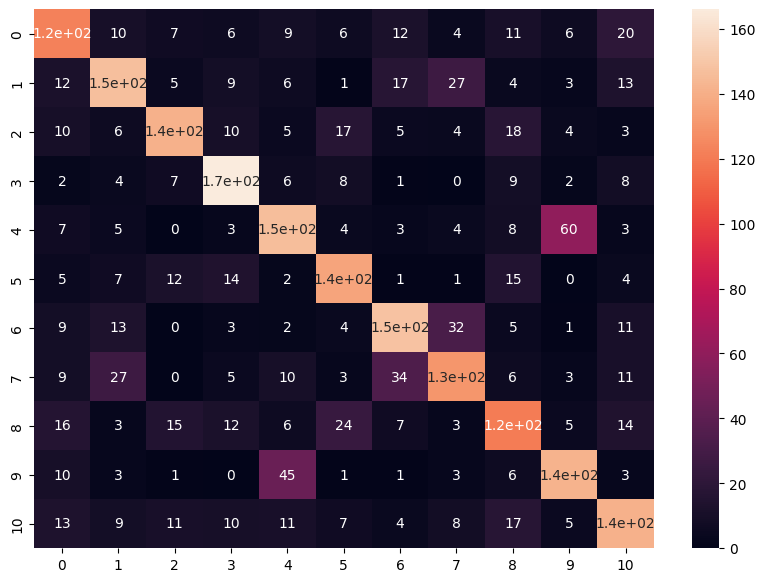

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
C2 = confusion_matrix(y_test,tfidf_test_predictions)
df_cm = pd.DataFrame(C2)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [33]:
c=0
for i in range(len(y_test)):
    if y_test[i] == 9 and tfidf_test_predictions[i] == 4:
        c+=1 
print(c)

45


<AxesSubplot: >

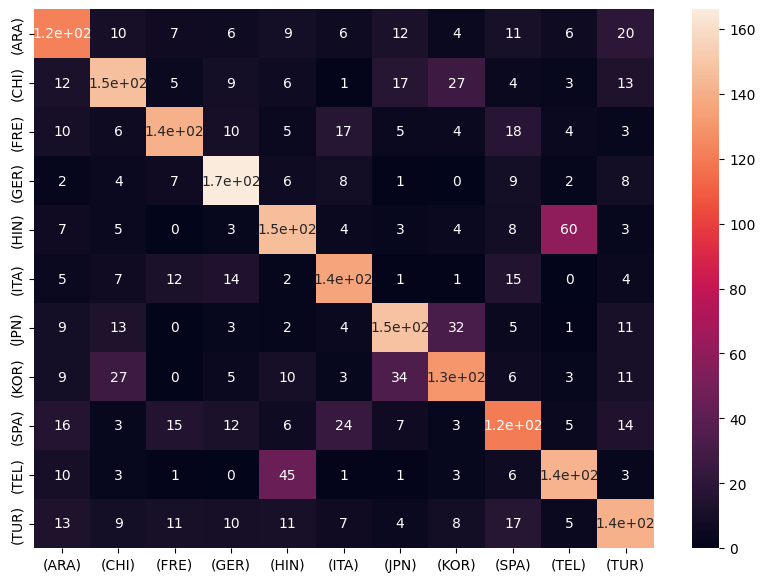

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
C2 = confusion_matrix(y_test,tfidf_test_predictions)

df_cm = pd.DataFrame(C2, index=list(langue), columns=list(langue))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [48]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)
kf.get_n_splits(X)
print(kf)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=4, random_state=None, shuffle=False)
Fold 0:
  Train: index=[2475 2476 2477 ... 9897 9898 9899]
  Test:  index=[   0    1    2 ... 2472 2473 2474]
Fold 1:
  Train: index=[   0    1    2 ... 9897 9898 9899]
  Test:  index=[2475 2476 2477 ... 4947 4948 4949]
Fold 2:
  Train: index=[   0    1    2 ... 9897 9898 9899]
  Test:  index=[4950 4951 4952 ... 7422 7423 7424]
Fold 3:
  Train: index=[   0    1    2 ... 7422 7423 7424]
  Test:  index=[7425 7426 7427 ... 9897 9898 9899]


# TF-IDF avec SVM

In [67]:
tf = TfidfVectorizer(stop_words='english')
tf_X = tf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, new_y, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

In [68]:
from sklearn import svm

modelSvm = svm.SVC(C=1.0, kernel='rbf',gamma='auto',
                   decision_function_shape='ovr',
                   cache_size=500)

modelSvm.fit(tf_train,y_train)

SVC(cache_size=500, gamma='auto')

In [41]:
svmPre=modelSvm.predict(tf_test)

In [27]:
accuracy(y_test,svmPre)

Accuracy: 0.08606060606060606


In [28]:
accuracy(y_test,svmPre)

Accuracy: 0.08606060606060606


In [42]:
print(y_test)
print(set(svmPre))

[ 8  7  6 ... 10  8  9]
{0}


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,svmPre)

array([[213,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [244,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [223,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [213,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [243,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [228,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [238,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [225,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [215,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)